In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
data = pd.read_csv('C:\\Users\\Acer\\Desktop\\projrct\\project12.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   YearBuilt      1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   1stFlrSF       1460 non-null   int64  
 5   GarageArea     1460 non-null   int64  
 6   MSZoning       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Street         1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  RoofStyle      1460 non-null   object 
 12  Foundation     1460 non-null   object 
 13  Electrical     1459 non-null   object 
 14  BedroomAbvGr   1460 non-null   int64  
 15  GarageType     1379 non-null   object 
 16  GarageCars     1460 non-null   int64  
 17  PavedDrive     1460 non-null   object 
 18  SaleType

In [4]:
data.shape

(1460, 22)

In [5]:
for i in data.columns:
    if data[i].isnull().sum()>500:
        print(i)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

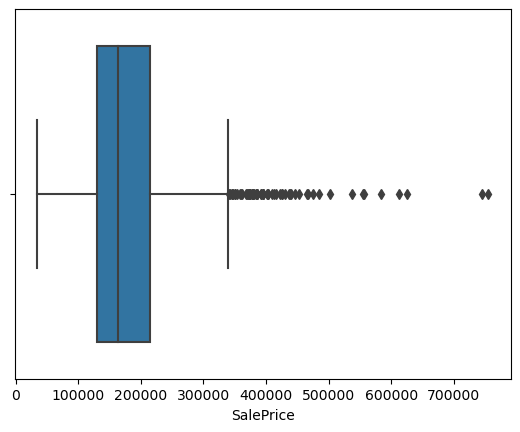

In [6]:
sns.boxplot(data.SalePrice,orient='h')

In [7]:
iqr = stats.iqr(data.SalePrice)
iqr

84025.0

In [8]:
q1 = data.SalePrice.quantile(.25)
q1

129975.0

In [9]:
q3 = data.SalePrice.quantile(.75)
q3

214000.0

In [10]:
upper = q3+1.5*(iqr)
upper

340037.5

In [11]:
lower = q1-1.5*(iqr)
lower

3937.5

In [12]:
data.SalePrice = np.where(data.SalePrice>upper, upper, data.SalePrice)

<AxesSubplot:>

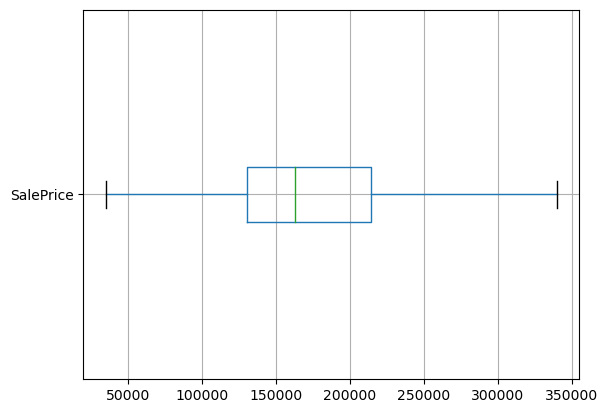

In [13]:
data.boxplot('SalePrice',vert = False)

In [14]:
data.columns

Index(['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'MSZoning', 'LandContour', 'LandSlope', 'Street',
       'BldgType', 'RoofStyle', 'Foundation', 'Electrical', 'BedroomAbvGr',
       'GarageType', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition',
       'HeatingQC', 'LotFrontage'],
      dtype='object')

In [8]:
cols = ['YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'MSZoning', 'LandContour', 'LandSlope', 'Street',
       'BldgType', 'RoofStyle', 'Foundation', 'Electrical', 'BedroomAbvGr',
       'GarageType', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition',
       'HeatingQC', 'LotFrontage']



In [21]:
cate=[]

for i in cols:
    if data[i].unique().shape[0]<25:
        cate.append(i)
        
print(cate)

['MSZoning', 'LandContour', 'LandSlope', 'Street', 'BldgType', 'RoofStyle', 'Foundation', 'Electrical', 'BedroomAbvGr', 'GarageType', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition', 'HeatingQC']


In [24]:
data.columns

Index(['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'MSZoning', 'LandContour', 'LandSlope', 'Street',
       'BldgType', 'RoofStyle', 'Foundation', 'Electrical', 'BedroomAbvGr',
       'GarageType', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition',
       'HeatingQC', 'LotFrontage'],
      dtype='object')

In [25]:
cols = ['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'MSZoning', 'LandContour', 'LandSlope', 'Street',
       'BldgType', 'RoofStyle', 'Foundation', 'Electrical', 'BedroomAbvGr',
       'GarageType', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition',
       'HeatingQC', 'LotFrontage']

In [29]:
nully = []

for i in cols:
    if data[i].isnull().sum()>=1:
        nully.append(i)
        
print(nully)

['Electrical', 'GarageType', 'LotFrontage']


In [42]:
for i in nully:
    print(i,"+")

Electrical +
GarageType +
LotFrontage +


In [38]:
for i in nully:
    print(i)

Electrical
GarageType
LotFrontage


# 1LandSlope

In [31]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [32]:
data['LandSlope'].isnull().sum()

0

In [37]:
model = ols('SalePrice ~ LandSlope',data = data).fit()
anova = sm.stats.anova_lm(model)
an = anova.round(decimals=4)


NameError: name 'iterrows' is not defined

In [18]:
data.drop(columns=['LandSlope'],axis=1,inplace = True)

## 2street

In [19]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [20]:
data.Street.isnull().sum()

0

In [21]:
model = ols('SalePrice ~ Street',data = data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Street,1.0,1.338868e+10,1.338868e+10,2.96831,0.085123
Residual,1458.0,6.576366e+12,4.510539e+09,NaN,NaN


In [22]:
data.drop(columns=['Street'],axis=1,inplace = True)

# 3BldgType

In [23]:
data.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [24]:
data.BldgType.isnull().sum()

0

In [25]:
data.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [26]:
f_oneway(data.BldgType=='1Fam',data.BldgType=='2fmCon',
         data.BldgType=='TwnhsE',data.BldgType=='Twnhs',
         data.BldgType=='Duplex')

F_onewayResult(statistic=3154.726364276677, pvalue=0.0)

In [27]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.BldgType,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -53101.0587 0.0001 -85835.7864 -20366.3311   True
  1Fam Duplex -47992.2399    0.0 -73478.3061 -22506.1736   True
  1Fam  Twnhs -45621.6889 0.0001 -73548.9517 -17694.4261   True
  1Fam TwnhsE   -273.2642    1.0 -17900.5892  17354.0609  False
2fmCon Duplex   5108.8189 0.9971 -35732.2751  45949.9128  False
2fmCon  Twnhs   7479.3698  0.989  -34928.028  49886.7676  False
2fmCon TwnhsE  52827.7946 0.0008  16369.9014  89285.6877   True
Duplex  Twnhs    2370.551 0.9998 -34728.8367  39469.9387  False
Duplex TwnhsE  47718.9757 0.0002  17599.9593  77837.9921   True
 Twnhs TwnhsE  45348.4247 0.0012  13137.4393  77559.4102   True
---------------------------------------------------------------


In [28]:
data.BldgType=data.BldgType.replace({'TwnhsE':'1Fam','Duplex':'2fmCon','Twnhs':'2fmCon'})

In [29]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.BldgType,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
  1Fam 2fmCon -48416.8215   0.0 -60453.2486 -36380.3945   True
--------------------------------------------------------------


# 4MSZoning

In [30]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [31]:
data['MSZoning'].isnull().sum()

0

In [32]:
model= ols('SalePrice~MSZoning', data = data).fit()
anova= sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
MSZoning,4.0,9.108125e+11,2.277031e+11,58.339747,1.020658e-45
Residual,1455.0,5.678942e+12,3.903053e+09,NaN,NaN


In [33]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSZoning'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1 group2   meandiff  p-adj     lower        upper    reject
-----------------------------------------------------------------
C (all)     FV 139011.5923    0.0   81051.4174 196971.7672   True
C (all)     RH   57030.375 0.1571  -11752.8314 125813.5814  False
C (all)     RL 112113.2659    0.0   57921.3903 166305.1414   True
C (all)     RM  50929.0826 0.0866   -4252.5965 106110.7616  False
     FV     RH -81981.2173    0.0 -129600.3602 -34362.0744   True
     FV     RL -26898.3265 0.0067  -48651.7783  -5144.8746   True
     FV     RM -88082.5097    0.0 -112196.2194 -63968.8001   True
     RH     RL  55082.8909 0.0043   12129.8902  98035.8915   True
     RH     RM  -6101.2924 0.9957  -50296.5251  38093.9402  False
     RL     RM -61184.1833    0.0  -73787.6944 -48580.6721   True
-----------------------------------------------------------------


In [34]:
data.MSZoning=data.MSZoning.replace({'C (all)':'RH','RM':'RH'})

In [35]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSZoning'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    FV     RH -89769.6825    0.0 -110260.7416 -69278.6233   True
    FV     RL -26898.3265 0.0022  -45614.1614  -8182.4915   True
    RH     RL   62871.356    0.0   52524.9078  73217.8042   True
----------------------------------------------------------------


# 5RoofStyle

In [36]:
data.RoofStyle

0       Gable
1       Gable
2       Gable
3       Gable
4       Gable
        ...  
1455    Gable
1456    Gable
1457    Gable
1458      Hip
1459    Gable
Name: RoofStyle, Length: 1460, dtype: object

In [37]:
data.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [38]:
data.RoofStyle.isnull().sum()

0

In [39]:
data.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [40]:
f_oneway(data.RoofStyle=='Gable',data.RoofStyle=='Hip',data.RoofStyle=='Gambrel',data.RoofStyle=='Mansard',data.RoofStyle=='Flat',data.RoofStyle=='Shed')

F_onewayResult(statistic=2409.2957757029344, pvalue=0.0)

In [41]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.RoofStyle,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
   Flat   Gable -24595.1884 0.7614  -76886.2344  27695.8575  False
   Flat Gambrel -45780.9091 0.5313 -122583.6157  31021.7975  False
   Flat     Hip  11404.0542 0.9902  -41760.2121  64568.3205  False
   Flat Mansard -14121.5714 0.9975 -102010.3087  73767.1658  False
   Flat    Shed     30310.0 0.9905 -112086.0291 172706.0291  False
  Gable Gambrel -21185.7207 0.8954  -77982.7992  35611.3579  False
  Gable     Hip  35999.2426    0.0   23602.0009  48396.4844   True
  Gable Mansard   10473.617 0.9983  -60601.5723  81548.8063  False
  Gable    Shed  54905.1884 0.8461  -77774.4313 187584.8082  False
Gambrel     Hip  57184.9633  0.053    -417.0666 114786.9932  False
Gambrel Mansard  31659.3377 0.9191  -58982.7319 122301.4072  False
Gambrel    Shed  76090.9091 0.6601  -68020.7967 220202.6149  F

In [42]:
data.RoofStyle= data.RoofStyle.replace({'Gable':'Flat','Gambrel':'Flat','Mansard':'Flat','Shed':'Hip'})

In [43]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.RoofStyle,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  Flat    Hip 35994.0067   0.0 27520.1762 44467.8373   True
-----------------------------------------------------------


# 6GarageType

In [44]:
data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [45]:
data.GarageType.isnull().sum()

81

In [46]:
data.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [47]:
data.GarageType.fillna('Attchd',inplace=True)

In [48]:
data.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
data.GarageType.isnull().sum()

0

In [50]:
model= ols("SalePrice~GarageType",data=data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
GarageType,5.0,1.282843e+12,2.565685e+11,70.295239,5.617546e-66
Residual,1454.0,5.306912e+12,3.649871e+09,NaN,NaN


In [51]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.GarageType,alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
 2Types  Attchd   39274.3523 0.6071  -31326.3959 109875.1005  False
 2Types Basment    8284.0614 0.9997  -72446.2815  89014.4043  False
 2Types BuiltIn   87309.9905 0.0083   14571.1819 160048.7992   True
 2Types CarPort  -41321.2222 0.7864 -132180.2254   49537.781  False
 2Types  Detchd  -17540.9109 0.9813   -88463.468  53381.6463  False
 Attchd Basment  -30990.2909 0.2318  -70933.0468   8952.4651  False
 Attchd BuiltIn   48035.6383    0.0   28827.0522  67244.2243   True
 Attchd CarPort  -80595.5745  0.001 -138331.1264 -22860.0226   True
 Attchd  Detchd  -56815.2631    0.0  -67209.7136 -46420.8126   True
Basment BuiltIn   79025.9291    0.0   35415.2379 122636.6204   True
Basment CarPort  -49605.2836 0.3262 -119364.2728  20153.7055  False
Basment  Detchd  -25824.9723 0.4536  -66333.8258

In [52]:
data.GarageType= data.GarageType.replace({'Attchd':'2Types','Basment':'2Types','Detchd':'CarPort'})

In [53]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.GarageType,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower        upper    reject
-----------------------------------------------------------------
 2Types BuiltIn  48880.3736   0.0   33073.7442  64687.0029   True
 2Types CarPort -56510.9894   0.0  -64972.3315 -48049.6474   True
BuiltIn CarPort -105391.363   0.0 -122128.0098 -88654.7162   True
-----------------------------------------------------------------


# 7GarageCars

In [54]:
data.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [55]:
data.GarageCars.isnull().sum()

0

In [56]:
model = ols('SalePrice~GarageCars',data= data).fit()
anova= sm.stats.anova_lm(model)
round(anova,5)

,df,sum_sq,mean_sq,F,PR(>F)
GarageCars,1.0,2.978423e+12,2.978423e+12,1202.47589,0.0
Residual,1458.0,3.611332e+12,2.476908e+09,NaN,NaN


In [57]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.GarageCars,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1  24799.4044 0.0002    9001.6545  40597.1543   True
     0      2   80226.886    0.0   65234.7731  95218.9988   True
     0      3 178763.3542    0.0  161552.0604  195974.648   True
     0      4   89338.516 0.0004   30009.6042 148667.4279   True
     1      2  55427.4816    0.0   47362.7837  63492.1794   True
     1      3 153963.9498    0.0  142280.4342 165647.4654   True
     1      4  64539.1117 0.0203    6571.9167 122506.3066   True
     2      3  98536.4682    0.0   87967.6895  109105.247   True
     2      4   9111.6301 0.9928  -48641.2074  66864.4676  False
     3      4 -89424.8381 0.0003 -147793.1122  -31056.564   True
----------------------------------------------------------------


In [58]:
data.GarageCars= data.GarageCars.replace({4:2})

In [59]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.GarageCars,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  24799.4044 0.0001   9926.6524  39672.1564   True
     0      2  80281.8415    0.0  66171.3646  94392.3184   True
     0      3 178763.3542    0.0 162559.8248 194966.8835   True
     1      2  55482.4371    0.0  47897.0328  63067.8414   True
     1      3 153963.9498    0.0 142964.5333 164963.3662   True
     2      3  98481.5127    0.0   88536.968 108426.0574   True
---------------------------------------------------------------


# 8GarageArea

In [60]:
data.GarageArea.value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

In [61]:
data.GarageArea.isnull().sum()

0

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

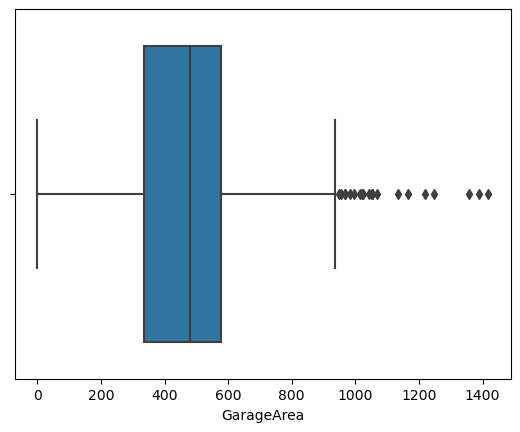

In [62]:
sns.boxplot(data.GarageArea)

In [63]:
iqr = stats.iqr(data.GarageArea)
iqr

q1= data.GarageArea.quantile(.25)
q1

q3=data.GarageArea.quantile(.75)
q3

upper = q3+1.5*iqr
upper

lower = q1-1.5*iqr
lower

print(iqr,"\n",q1,"\n",q3,"\n",upper,"\n",lower)

241.5 
 334.5 
 576.0 
 938.25 
 -27.75


In [64]:
data.GarageArea= np.where(data.GarageArea>upper,upper,data.GarageArea)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

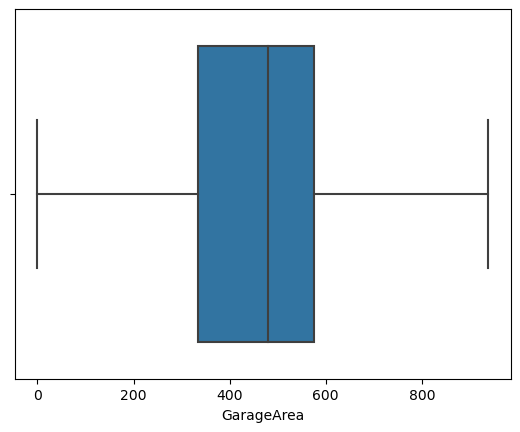

In [65]:
sns.boxplot(data.GarageArea)

# 9.HeatingQC

In [66]:
data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [67]:
data.HeatingQC.isnull().sum()

0

In [68]:
model = ols('SalePrice~HeatingQC',data= data).fit()
anova= sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
HeatingQC,4.0,1.479951e+12,3.699877e+11,105.352779,7.121485e-79
Residual,1455.0,5.109804e+12,3.511893e+09,NaN,NaN


In [69]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.HeatingQC,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa   -84136.633    0.0 -108010.9268 -60262.3392   True
    Ex     Gd  -51632.4693    0.0  -63634.7077 -39630.2308   True
    Ex     Po -121056.1228 0.2468 -283019.5587  40907.3131  False
    Ex     TA  -65819.4733    0.0  -75646.0081 -55992.9384   True
    Fa     Gd   32504.1637 0.0044    7140.2323  57868.0952   True
    Fa     Po  -36919.4898 0.9725 -200416.9817 126578.0021  False
    Fa     TA   18317.1597  0.243    -6092.594  42726.9135  False
    Gd     Po  -69423.6535 0.7691 -231613.3624  92766.0554  False
    Gd     TA   -14187.004  0.025  -27221.8764  -1152.1315   True
    Po     TA   55236.6495 0.8849 -106806.5815 217279.8806  False
-----------------------------------------------------------------


In [70]:
data.HeatingQC= data.HeatingQC.replace({'Po':'Ex','TA':'Fa'})

In [71]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.HeatingQC,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Ex     Fa -67537.9618    0.0 -75715.1753 -59360.7483   True
    Ex     Gd -51469.3209    0.0 -61800.0485 -41138.5932   True
    Fa     Gd  16068.6409 0.0018   5056.8201  27080.4618   True
---------------------------------------------------------------


# 10Electrical

In [72]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [73]:
data.Electrical.isnull().sum()

1

In [74]:
data.Electrical.fillna('SBrkr', inplace = True)

In [75]:
data.Electrical.isnull().sum()

0

In [76]:
model = ols("SalePrice~Electrical", data = data).fit()
anova = sm.stats.anova_lm(model)
round(anova,4)

,df,sum_sq,mean_sq,F,PR(>F)
Electrical,4.0,4.892899e+11,1.223225e+11,29.1747,0.0
Residual,1455.0,6.100465e+12,4.192760e+09,NaN,NaN


In [77]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.Electrical,alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 FuseA  FuseF -14521.4492 0.8429  -53135.9434  24093.0451  False
 FuseA  FuseP -24863.5603 0.9658 -128584.1048  78856.9842  False
 FuseA    Mix -55196.8936 0.9155 -232984.4459 122590.6587  False
 FuseA  SBrkr  60687.9629    0.0   41816.0889   79559.837   True
 FuseF  FuseP -10342.1111  0.999 -117969.1998  97284.9776  False
 FuseF    Mix -40675.4444 0.9724 -220770.0102 139419.1214  False
 FuseF  SBrkr  75209.4121    0.0   40832.2902  109586.534   True
 FuseP    Mix -30333.3333 0.9943 -234541.3763 173874.7096  False
 FuseP  SBrkr  85551.5232   0.15  -16667.1575 187770.2039  False
   Mix  SBrkr 115884.8566 0.3803  -61030.7196 292800.4327  False
----------------------------------------------------------------


In [78]:
data.Electrical = data.Electrical.replace({"FuseF":"FuseA","FuseP":"FuseA","Mix":"FuseA"})

In [79]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.Electrical,alpha = 0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
 FuseA  SBrkr 64862.8966   0.0 52986.3101 76739.483   True
----------------------------------------------------------


# 11Foundation

In [80]:
data.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [81]:
data.Foundation.isnull().sum()

0

In [82]:
model = ols('SalePrice ~ Foundation',data= data).fit()
anova= sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Foundation,5.0,1.968463e+12,3.936926e+11,123.867747,2.237763e-109
Residual,1454.0,4.621292e+12,3.178330e+09,NaN,NaN


In [83]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.Foundation,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
BrkTil CBlock   18141.4476 0.0062    3373.9736  32908.9216   True
BrkTil  PConc   86263.6414    0.0   71523.9634 101003.3194   True
BrkTil   Slab  -24001.0497 0.3824  -59435.2293    11433.13  False
BrkTil  Stone    34592.492 0.6816  -32419.0654 101604.0495  False
BrkTil   Wood    54299.992 0.5644  -39528.7837 148128.7677  False
CBlock  PConc   68122.1938    0.0   59132.2337   77112.154   True
CBlock   Slab  -42142.4972 0.0045  -75596.0825   -8688.912   True
CBlock  Stone   16451.0444 0.9806  -49534.6367  82436.7255  False
CBlock   Wood   36158.5444 0.8781  -56940.3301 129257.4189  False
 PConc   Slab -110264.6911    0.0 -143706.0155 -76823.3666   True
 PConc  Stone  -51671.1494 0.2224 -117650.6154  14308.3165  False
 PConc   Wood  -31963.6494 0.9244 -125058.1189  61130.8201  False
  Slab  St

In [84]:
data.Foundation=data.Foundation.replace({'Slab':'BrkTil','Stone':'BrkTil','Wood':'BrkTil'})

In [85]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.Foundation,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
BrkTil CBlock 19289.8848 0.0002  8070.7286  30509.041   True
BrkTil  PConc 87412.0786    0.0  76217.766 98606.3913   True
CBlock  PConc 68122.1938    0.0 60714.8269 75529.5608   True
------------------------------------------------------------


# 12PavedDrive

In [86]:
data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [87]:
data.PavedDrive.isnull().sum()

0

In [88]:
model = ols('SalePrice~PavedDrive',data=data).fit()
anova=sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
PavedDrive,2.0,4.460977e+11,2.230489e+11,52.897187,6.649574e-23
Residual,1457.0,6.143657e+12,4.216649e+09,NaN,NaN


In [89]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.PavedDrive,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     N      P 17290.8778 0.4164 -14826.4567 49408.2122  False
     N      Y 67483.7192    0.0  50894.5316 84072.9068   True
     P      Y 50192.8414 0.0001  22068.7818 78316.9011   True
-------------------------------------------------------------


In [90]:
data.PavedDrive=data.PavedDrive.replace({'P':'N'})

In [91]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.PavedDrive,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     N      Y 63160.9998   0.0 51021.1159 75300.8836   True
-----------------------------------------------------------


# 13SaleType

In [92]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [93]:
data.SaleType.isnull().sum()

0

In [94]:
model = ols('SalePrice~SaleType',data= data).fit()
anova= sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SaleType,8.0,8.610576e+11,1.076322e+11,27.261753,1.116109e-39
Residual,1451.0,5.728697e+12,3.948103e+09,NaN,NaN


In [95]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.SaleType,alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
   COD    CWD   66626.7442 0.5235  -35406.7561 168660.2444  False
   COD    Con  125626.7442 0.1271  -15566.8882 266820.3766  False
   COD  ConLD   -5192.3669    1.0  -76741.4824  66356.7485  False
   COD  ConLI   34034.2442 0.9669  -58193.0503 126261.5386  False
   COD  ConLw    -273.2558    1.0  -92500.5503  91954.0386  False
   COD    New  110059.7319    0.0   75443.0124 144676.4514   True
   COD    Oth  -24123.2558 0.9994 -140681.2702  92434.7586  False
   COD     WD    27394.099 0.1128   -2873.0276  57661.2255  False
   CWD    Con      59000.0 0.9765 -110039.6993 228039.6993  False
   CWD  ConLD  -71819.1111 0.6124 -189113.8427  45475.6204  False
   CWD  ConLI     -32592.5 0.9975 -163530.0881  98345.0881  False
   CWD  ConLw     -66900.0  0.812 -197837.5881  64037.5881  False
   CWD    

In [96]:
data.SaleType= data.SaleType.replace({'CWD':'COD','Con':'COD','ConLD':'COD','ConLI':'COD','ConLw':'COD','Oth':'COD'})

In [97]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.SaleType,alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   COD    New 102067.2764    0.0  80007.6481 124126.9048   True
   COD     WD  19401.6435 0.0313   1378.1406  37425.1465   True
   New     WD -82665.6329    0.0 -96674.7746 -68656.4913   True
---------------------------------------------------------------


# 14SaleCondition

In [98]:
data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [99]:
data.SaleCondition.isnull().sum()

0

In [100]:
model = ols('SalePrice ~ SaleCondition',data = data).fit()
anova= sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SaleCondition,5.0,8.749043e+11,1.749809e+11,44.51948,7.670924e-43
Residual,1454.0,5.714851e+12,3.930434e+09,NaN,NaN


In [101]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.SaleCondition,alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
Abnorml AdjLand -38392.0941 0.8364 -129594.1596  52809.9715  False
Abnorml  Alloca  23271.7809 0.8293   -31352.863  77896.4249  False
Abnorml  Family   7082.9059 0.9974  -36701.3232  50867.1351  False
Abnorml  Normal  30793.9936    0.0   12257.9865  49330.0007   True
Abnorml Partial 109364.1259    0.0   85428.8062 133299.4457   True
AdjLand  Alloca   61663.875 0.5295  -41621.7971 164949.5471  False
AdjLand  Family     45475.0 0.7716  -52510.3921 143460.3921  False
AdjLand  Normal  69186.0876 0.2367  -20411.1327  158783.308  False
AdjLand Partial   147756.22 0.0001   56888.3056 238624.1344   True
 Alloca  Family  -16188.875 0.9811  -81512.4697  49134.7197  False
 Alloca  Normal   7522.2126 0.9985  -44378.6242  59423.0495  False
 Alloca Partial   86092.345 0.0001   32027.4503 140157.2397   

In [102]:
data.SaleCondition= data.SaleCondition.replace({'AdjLand':'Abnorml','Family':'Abnorml','Alloca':'Abnorml'})

In [103]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.SaleCondition,alpha = 0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj   lower       upper    reject
--------------------------------------------------------------
Abnorml  Normal 28842.5256   0.0 15575.9035  42109.1477   True
Abnorml Partial 107412.658   0.0 89218.0051 125607.3108   True
 Normal Partial 78570.1324   0.0 64743.8658  92396.3989   True
--------------------------------------------------------------


In [104]:
data.shape

(1460, 20)

In [105]:
data.columns

Index(['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'MSZoning', 'LandContour', 'BldgType', 'RoofStyle',
       'Foundation', 'Electrical', 'BedroomAbvGr', 'GarageType', 'GarageCars',
       'PavedDrive', 'SaleType', 'SaleCondition', 'HeatingQC', 'LotFrontage'],
      dtype='object')

# 15.BedroomAbvGr

In [106]:
data.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [107]:
data.BedroomAbvGr.isnull().sum()

0

In [108]:
model = ols("SalePrice~BedroomAbvGr",data = data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
BedroomAbvGr,1.0,2.165568e+11,2.165568e+11,49.541824,2.979531e-12
Residual,1458.0,6.373198e+12,4.371192e+09,NaN,NaN


In [109]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.BedroomAbvGr, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1 -47365.2567 0.7004 -132946.1563  38215.6429  False
     0      2 -59094.8552 0.3524 -140636.0395   22446.329  False
     0      3 -34210.3389 0.9066 -115377.8672  46957.1894  False
     0      4  -6119.5129    1.0  -88116.9148   75877.889  False
     0      5  -33180.369 0.9573 -124874.1901   58513.452  False
     0      6 -70220.4167 0.5275 -180422.6744  39981.8411  False
     0      8 -13999.4167    1.0 -227951.6657 199952.8324  False
     1      2 -11729.5985 0.9347  -41634.8203  18175.6232  False
     1      3  13154.9177 0.8651   -15715.919  42025.7544  False
     1      4  41245.7438 0.0016   10118.0796  72373.4079   True
     1      5  14184.8876  0.991  -37323.5037  65693.2789  False
     1      6   -22855.16 0.9888 -102791.9799  57081.6599  False
     1      8    33365.84

In [110]:
data.BedroomAbvGr = data.BedroomAbvGr.replace({1:0,2:0,5:0,6:0,8:0}) 

In [111]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.BedroomAbvGr, alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      3 21605.8035   0.0 12532.9296 30678.6773   True
     0      4 49696.6295   0.0 36911.5984 62481.6606   True
     3      4  28090.826   0.0 16274.4532 39907.1988   True
-----------------------------------------------------------


# 16.LandContour

In [112]:
data.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [113]:
data.LandContour.isnull().sum()

0

In [114]:
model = ols("SalePrice~LandContour",data = data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
LandContour,3.0,1.871070e+11,6.236900e+10,14.18308,4.103846e-09
Residual,1456.0,6.402648e+12,4.397423e+09,NaN,NaN


In [115]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.LandContour, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  77080.4906    0.0  44776.6506 109384.3306   True
   Bnk    Low  58336.8929 0.0002  22702.7532  93971.0325   True
   Bnk    Lvl  33575.8352 0.0005  11577.3918  55574.2786   True
   HLS    Low -18743.5978 0.5674 -56024.2223  18537.0267  False
   HLS    Lvl -43504.6554    0.0 -68080.7529  -18928.558   True
   Low    Lvl -24761.0577 0.1209 -53574.9154   4052.8001  False
---------------------------------------------------------------


In [116]:
data.LandContour = data.LandContour.replace({'Low':'HLS'}) 

In [117]:
tukey = pairwise_tukeyhsd(data.SalePrice,data.LandContour, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  69234.3334    0.0  43428.3774  95040.2895   True
   Bnk    Lvl  33575.8352 0.0003  13504.8789  53646.7915   True
   HLS    Lvl -35658.4982    0.0 -52980.3354 -18336.6611   True
---------------------------------------------------------------


# Continous

# 1.YearBuilt

In [118]:
data.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [119]:
data.YearBuilt.isnull().sum()

0

<AxesSubplot:>

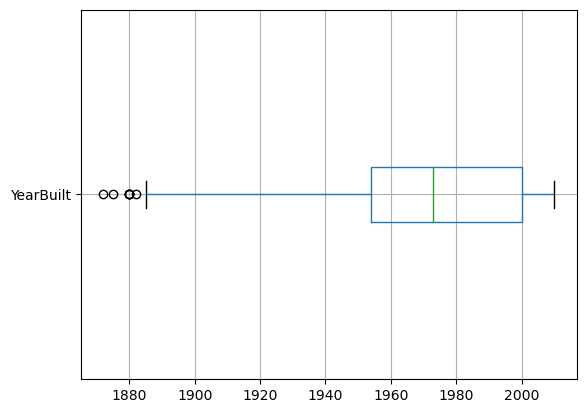

In [120]:
data.boxplot("YearBuilt", vert = False)

In [121]:
iqr = stats.iqr(data.YearBuilt)

q1 = data.YearBuilt.quantile(0.25)

q3 = data.YearBuilt.quantile(0.75)

print(q1,q3,iqr)


1954.0 2000.0 46.0


In [122]:
lower = q1 - 1.5*iqr
lower

1885.0

In [123]:
data.YearBuilt = np.where(data.YearBuilt<lower,lower,data.YearBuilt)

<AxesSubplot:>

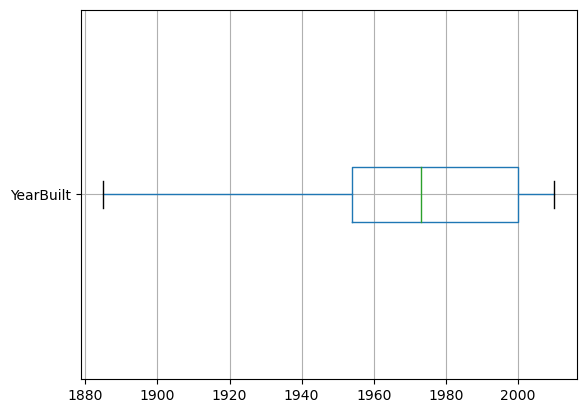

In [124]:
data.boxplot("YearBuilt", vert = False)

# 2.LotArea

In [125]:
data.LotArea.value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [126]:
data.LotArea.isnull().sum()

0

<AxesSubplot:>

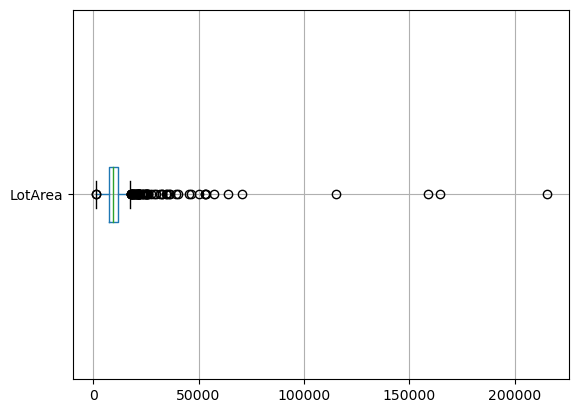

In [127]:
data.boxplot("LotArea",vert = False)

In [128]:
iqr = stats.iqr(data.LotArea)

q1 = data.LotArea.quantile(0.25)

q3 = data.LotArea.quantile(0.75)

print(q1,q3,iqr)

7553.5 11601.5 4048.0


In [129]:
upper = q3 + 1.5*iqr
upper

17673.5

In [130]:
lower = q1 - 1.5*iqr
lower

1481.5

In [131]:
data.LotArea = np.where(data.LotArea<lower,lower,data.LotArea)
data.LotArea = np.where(data.LotArea>upper,upper,data.LotArea)

<AxesSubplot:>

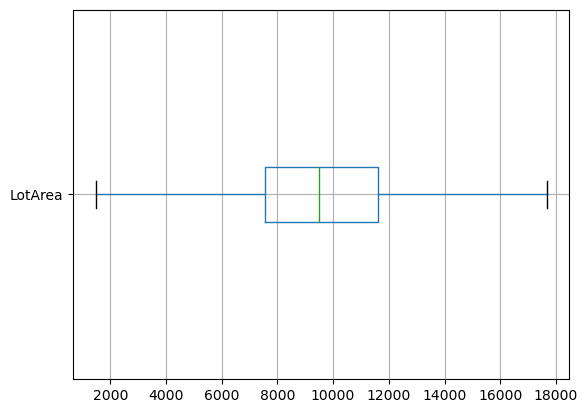

In [132]:
data.boxplot("LotArea", vert = False)

# 3.TotalBsmtSF

In [133]:
data.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [134]:
data.TotalBsmtSF.isnull().sum()

0

<AxesSubplot:>

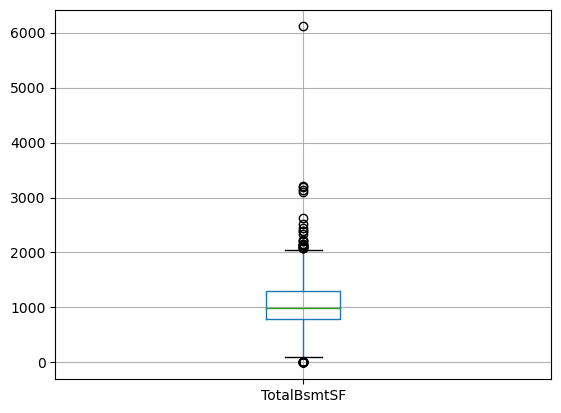

In [135]:
data.boxplot("TotalBsmtSF")

In [136]:
iqr = stats.iqr(data.TotalBsmtSF)

q1 = data.TotalBsmtSF.quantile(0.25)

q3 = data.TotalBsmtSF.quantile(0.75)

print(q1,q3,iqr)

795.75 1298.25 502.5


In [137]:
upper = q3 + 1.5*iqr

lower = q1 - 1.5*iqr
print(lower,upper)

42.0 2052.0


In [138]:
data.TotalBsmtSF = np.where(data.TotalBsmtSF<lower,lower,data.TotalBsmtSF)
data.TotalBsmtSF = np.where(data.TotalBsmtSF>upper,upper,data.TotalBsmtSF)

<AxesSubplot:>

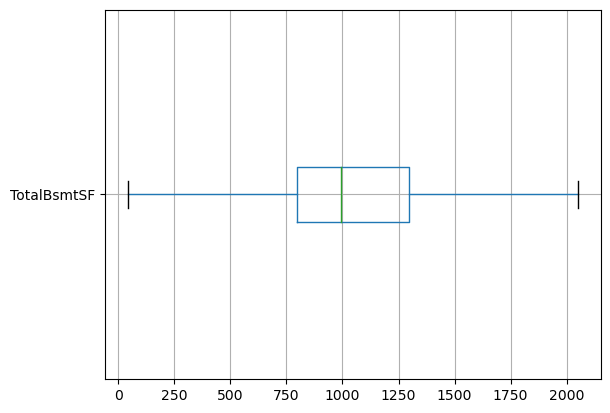

In [139]:
data.boxplot("TotalBsmtSF",vert=False)

# 4.1stFlrSF

In [140]:
data["1stFlrSF"].isnull().sum()

0

In [141]:
data["1stFlrSF"].value_counts()

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64

<AxesSubplot:>

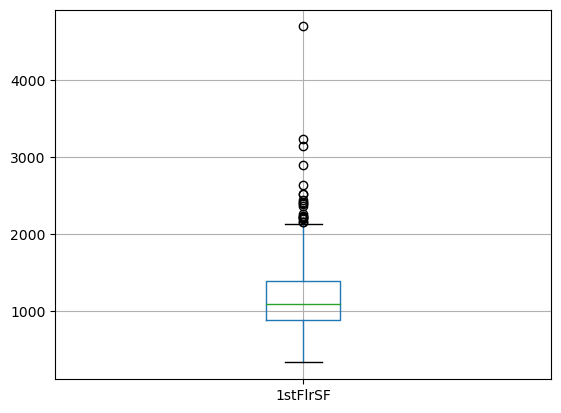

In [142]:
data.boxplot("1stFlrSF")

In [143]:
iqr = stats.iqr(data['1stFlrSF'])

q3 = data['1stFlrSF'].quantile(0.75)

print(iqr,q3)

509.25 1391.25


In [144]:
upper = q3 + 1.5*iqr
upper

2155.125

In [145]:
data['1stFlrSF'] = np.where(data['1stFlrSF']>upper,upper,data['1stFlrSF'])

<AxesSubplot:>

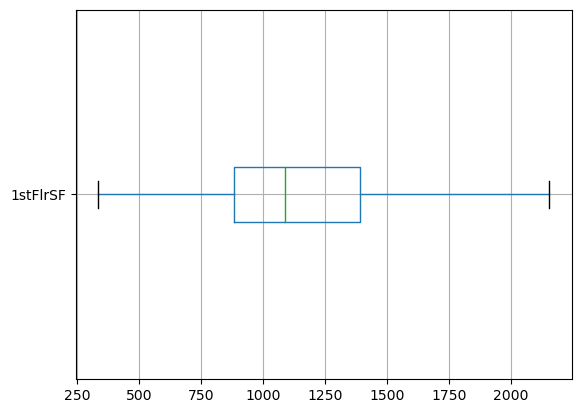

In [146]:
data.boxplot("1stFlrSF", vert = False)

# 5.LotFontage

In [147]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [148]:
data.LotFrontage.isnull().sum()

259

<AxesSubplot:>

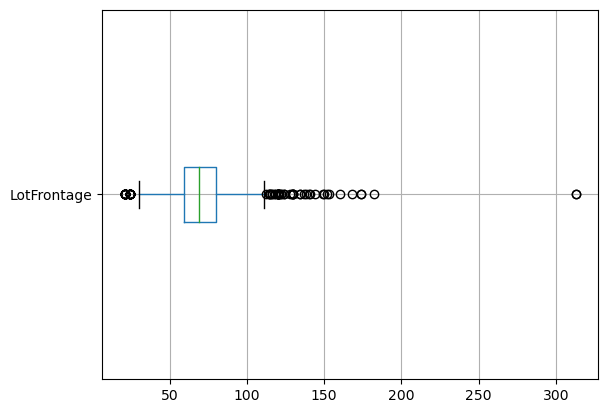

In [149]:
data.boxplot("LotFrontage", vert = False)

In [150]:
data.LotFrontage.median()

69.0

In [151]:
data.LotFrontage.fillna(69.0,inplace = True)

In [152]:
data.LotFrontage.isnull().sum()

0

<AxesSubplot:>

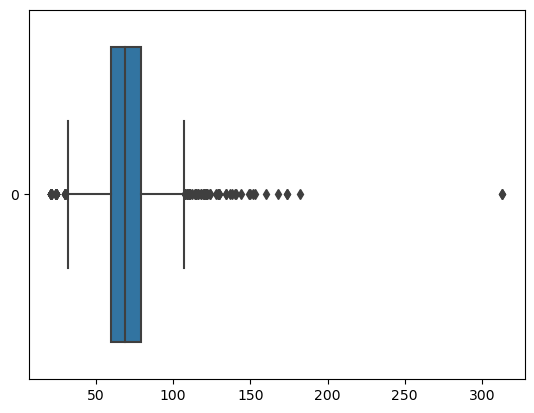

In [153]:
sns.boxplot(data=data.LotFrontage,orient = "h")

In [154]:
iqr = stats.iqr(data.LotFrontage)

Q1 = data.LotFrontage.quantile(0.25)

Q3 = data.LotFrontage.quantile(0.75)

lower_bound_LotFrontage = Q1-1.5*iqr 

upper_bound_LotFrontage = Q3+1.5*iqr

In [155]:
data.LotFrontage = np.where(data.LotFrontage>upper_bound_LotFrontage,upper_bound_LotFrontage,data.LotFrontage)

In [156]:
data.LotFrontage = np.where(data.LotFrontage<lower_bound_LotFrontage,lower_bound_LotFrontage,data.LotFrontage)

<AxesSubplot:>

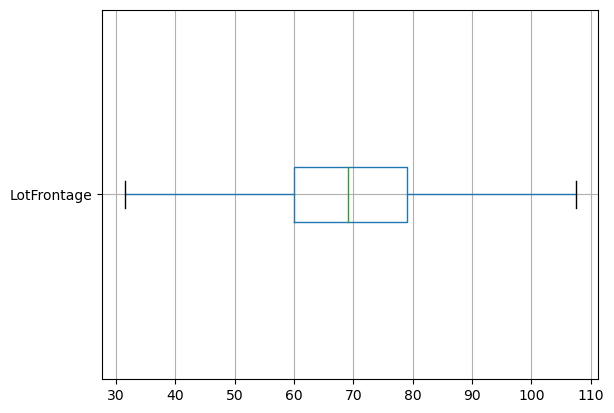

In [157]:
data.boxplot('LotFrontage',vert = False)

In [158]:
numeric = data.select_dtypes(include='number')

In [159]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   YearBuilt     1460 non-null   float64
 2   LotArea       1460 non-null   float64
 3   TotalBsmtSF   1460 non-null   float64
 4   1stFlrSF      1460 non-null   float64
 5   GarageArea    1460 non-null   float64
 6   BedroomAbvGr  1460 non-null   int64  
 7   GarageCars    1460 non-null   int64  
 8   LotFrontage   1460 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 102.8 KB


In [160]:
numeric.columns

Index(['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'BedroomAbvGr', 'GarageCars', 'LotFrontage'],
      dtype='object')

In [161]:
b = []

for i in numeric:
    if len(data[i].unique())>25:
        b.append(i)

In [162]:
print(b)

['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotFrontage']


In [163]:
data_conti = data[b]

In [164]:
data_conti

,SalePrice,YearBuilt,LotArea,TotalBsmtSF,1stFlrSF,GarageArea,LotFrontage
0,208500.0,2003.0,8450.0,856.0,856.0,548.0,65.0
1,181500.0,1976.0,9600.0,1262.0,1262.0,460.0,80.0
2,223500.0,2001.0,11250.0,920.0,920.0,608.0,68.0
3,140000.0,1915.0,9550.0,756.0,961.0,642.0,60.0
4,250000.0,2000.0,14260.0,1145.0,1145.0,836.0,84.0
...,...,...,...,...,...,...,...
1455,175000.0,1999.0,7917.0,953.0,953.0,460.0,62.0
1456,210000.0,1978.0,13175.0,1542.0,2073.0,500.0,85.0
1457,266500.0,1941.0,9042.0,1152.0,1188.0,252.0,66.0
1458,142125.0,1950.0,9717.0,1078.0,1078.0,240.0,68.0


In [165]:
data_conti.corr()

,SalePrice,YearBuilt,LotArea,TotalBsmtSF,1stFlrSF,GarageArea,LotFrontage
SalePrice,1.000000,0.570327,0.435876,0.645251,0.621873,0.660029,0.375850
YearBuilt,0.570327,1.000000,0.065765,0.410450,0.288418,0.487439,0.140115
LotArea,0.435876,0.065765,1.000000,0.361769,0.458118,0.344650,0.579385
TotalBsmtSF,0.645251,0.410450,0.361769,1.000000,0.807158,0.485659,0.336444
1stFlrSF,0.621873,0.288418,0.458118,0.807158,1.000000,0.487426,0.392061
GarageArea,0.660029,0.487439,0.344650,0.485659,0.487426,1.000000,0.345119
LotFrontage,0.375850,0.140115,0.579385,0.336444,0.392061,0.345119,1.000000


<AxesSubplot:>

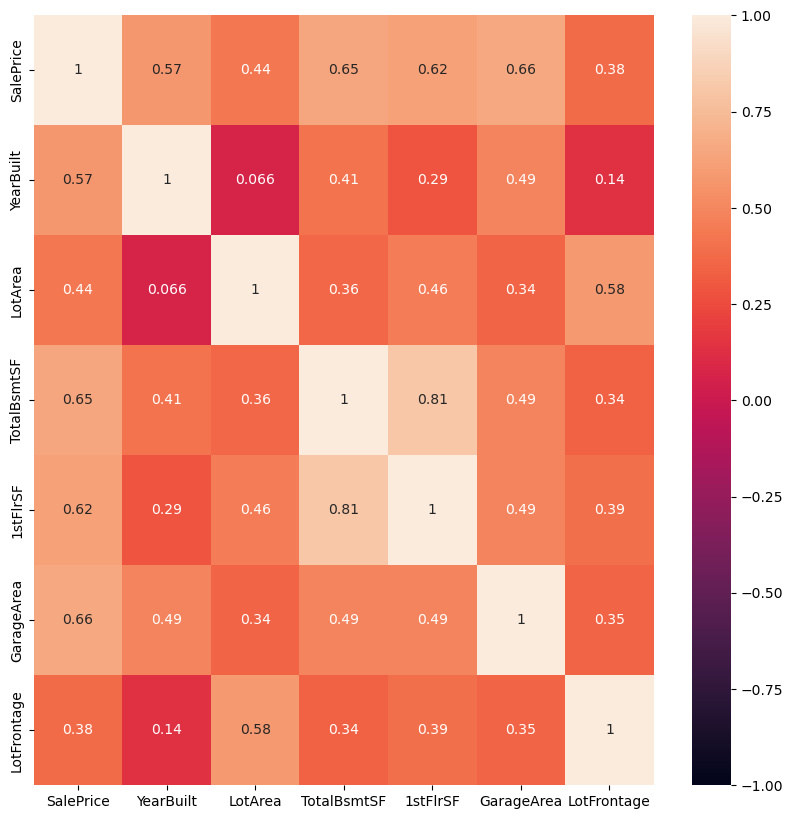

In [166]:
plt.figure(figsize=(10,10))

sns.heatmap(data_conti.corr(), annot=True, vmin= -1, vmax=1)

In [167]:
data_conti.columns

Index(['SalePrice', 'YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'LotFrontage'],
      dtype='object')

In [168]:
x = ['YearBuilt', 'LotArea', 'TotalBsmtSF', '1stFlrSF','GarageArea', 'LotFrontage']

In [169]:
vif_da = data[x]

In [170]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_da.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
  
print(vif_data)

       feature        VIF
0    YearBuilt  20.908933
1      LotArea  13.770347
2  TotalBsmtSF  23.688105
3     1stFlrSF  35.940961
4   GarageArea   8.753981
5  LotFrontage  27.035334


In [184]:
data.drop(columns=['YearBuilt','TotalBsmtSF','1stFlrSF','LotFrontage','LotArea'],axis=1,inplace=True)

KeyError: "['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'LotFrontage', 'LotArea'] not found in axis"

In [185]:
numeric = data.select_dtypes(include='number')

In [186]:
b = []

for i in numeric:
    if len(data[i].unique())>25:
        b.append(i)

In [187]:
b

['SalePrice', 'GarageArea']

In [188]:
x = ['GarageArea']

In [189]:
vif_da = data[x]

In [190]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_da.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
  
print(vif_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [191]:
a=[]
for i in data.columns:
    if i not in b:
        a.append(i)

In [192]:
data_cate = data[a]

In [194]:
for i in a:
    print(i,"+", end=" ")

MSZoning + LandContour + BldgType + RoofStyle + Foundation + Electrical + BedroomAbvGr + GarageType + GarageCars + PavedDrive + SaleType + SaleCondition + HeatingQC + 

In [195]:
model = ols("SalePrice ~ MSZoning + LandContour + BldgType + RoofStyle + Foundation + Electrical + BedroomAbvGr +GarageType + GarageCars + PavedDrive + SaleType + SaleCondition + HeatingQC", data=data).fit()
anova = sm.stats.anova_lm(model)
ano = anova.round(decimals=6)
            
print(ano)

                   df        sum_sq       mean_sq           F    PR(>F)
MSZoning          2.0  8.849738e+11  4.424869e+11  273.214916  0.000000
LandContour       2.0  1.281766e+11  6.408829e+10   39.571514  0.000000
BldgType          1.0  1.356774e+11  1.356774e+11   83.774444  0.000000
RoofStyle         1.0  2.149205e+11  2.149205e+11  132.703346  0.000000
Foundation        2.0  1.323901e+12  6.619503e+11  408.723307  0.000000
Electrical        1.0  8.732713e+10  8.732713e+10   53.920407  0.000000
GarageType        2.0  2.387519e+11  1.193759e+11   73.709050  0.000000
PavedDrive        1.0  5.022565e+10  5.022565e+10   31.011985  0.000000
SaleType          2.0  1.060049e+11  5.300244e+10   32.726523  0.000000
SaleCondition     2.0  2.303538e+10  1.151769e+10    7.111633  0.000845
HeatingQC         2.0  1.276440e+11  6.382202e+10   39.407105  0.000000
BedroomAbvGr      1.0  1.093093e+11  1.093093e+11   67.493373  0.000000
GarageCars        1.0  8.292665e+11  8.292665e+11  512.033190  0

# model1 

In [196]:
data.shape

(1460, 15)

In [197]:
col = data.columns

In [198]:
for i in col: print(i, "+", end=" ")

SalePrice + GarageArea + MSZoning + LandContour + BldgType + RoofStyle + Foundation + Electrical + BedroomAbvGr + GarageType + GarageCars + PavedDrive + SaleType + SaleCondition + HeatingQC + 

In [199]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [200]:
model_1 = smf.ols(formula= 'SalePrice ~ GarageArea + MSZoning + LandContour + BldgType + RoofStyle + Foundation + Electrical + BedroomAbvGr + GarageType + GarageCars + PavedDrive + SaleType + SaleCondition + HeatingQC ', data = trn).fit()

In [201]:

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     96.48
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          3.88e-221
Time:                        20:48:52   Log-Likelihood:                -11991.
No. Observations:                1000   AIC:                         2.403e+04
Df Residuals:                     978   BIC:                         2.413e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [202]:
droppy = ['LandContour','BldgType','Electrical','PavedDrive','SaleType']

In [203]:
data.drop(columns=droppy, axis=1, inplace=True)

In [204]:
data.columns

Index(['SalePrice', 'GarageArea', 'MSZoning', 'RoofStyle', 'Foundation',
       'BedroomAbvGr', 'GarageType', 'GarageCars', 'SaleCondition',
       'HeatingQC'],
      dtype='object')

In [205]:
data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial'], dtype=object)

In [206]:
data.Foundation.replace({"CBlock":"BrkTil"}, inplace = True)
data.SaleCondition.replace({"Partial":"Abnorml"}, inplace = True)

# model 2

In [207]:
data.shape

(1460, 10)

In [208]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [209]:
col = data.columns

In [210]:
for i in col: print(i, "+", end=" ")

SalePrice + GarageArea + MSZoning + RoofStyle + Foundation + BedroomAbvGr + GarageType + GarageCars + SaleCondition + HeatingQC + 

In [211]:
model_2 = smf.ols(formula= 'SalePrice ~ GarageArea + MSZoning + RoofStyle + Foundation + BedroomAbvGr + GarageType + GarageCars + SaleCondition + HeatingQC', data = trn).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          5.96e-221
Time:                        20:49:32   Log-Likelihood:                -12014.
No. Observations:                1000   AIC:                         2.405e+04
Df Residuals:                     987   BIC:                         2.412e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [212]:
data.SaleCondition.unique()

array(['Normal', 'Abnorml'], dtype=object)

In [213]:
data.drop(columns=["SaleCondition"], axis=1, inplace=True)

In [214]:
data.columns.shape

(9,)

In [215]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [216]:
col = data.columns

In [217]:
for i in col: print(i, "+", end=" ")

SalePrice + GarageArea + MSZoning + RoofStyle + Foundation + BedroomAbvGr + GarageType + GarageCars + HeatingQC + 

In [218]:
model_3 = smf.ols(formula= 'SalePrice ~  GarageArea + MSZoning + RoofStyle + Foundation + BedroomAbvGr + GarageType + GarageCars + HeatingQC', data = trn).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          6.44e-222
Time:                        20:49:58   Log-Likelihood:                -12015.
No. Observations:                1000   AIC:                         2.405e+04
Df Residuals:                     988   BIC:                         2.411e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.035e+

In [219]:
model_3 = smf.ols(formula= 'SalePrice ~ GarageArea + MSZoning + RoofStyle + Foundation + BedroomAbvGr + GarageType + GarageCars + HeatingQC', data = tst).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     69.79
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           7.45e-90
Time:                        20:50:09   Log-Likelihood:                -5516.0
No. Observations:                 460   AIC:                         1.106e+04
Df Residuals:                     448   BIC:                         1.111e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.986e+

In [220]:
droppy = ["MSZoning","BedroomAbvGr"]

In [221]:
data.drop(columns = droppy, axis = 1, inplace = True)

In [222]:
data.GarageType.unique()

array(['2Types', 'CarPort', 'BuiltIn'], dtype=object)

In [223]:
data.GarageType.replace({"BuiltIn":"2Types"}, inplace = True)

# model 4

In [224]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [225]:
col = data.columns

In [226]:
for i in col: print(i, "+", end=" ")

SalePrice + GarageArea + RoofStyle + Foundation + GarageType + GarageCars + HeatingQC + 

In [227]:
model_4 = smf.ols(formula= 'SalePrice ~ GarageArea + RoofStyle + Foundation + GarageType + GarageCars + HeatingQC', data = trn).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     248.3
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          4.65e-213
Time:                        20:50:44   Log-Likelihood:                -12046.
No. Observations:                1000   AIC:                         2.411e+04
Df Residuals:                     992   BIC:                         2.415e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.015e+

In [228]:
model_4 = smf.ols(formula= 'SalePrice ~ GarageArea + RoofStyle + Foundation + GarageType + GarageCars + HeatingQC', data = tst).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.37e-90
Time:                        20:50:55   Log-Likelihood:                -5523.7
No. Observations:                 460   AIC:                         1.106e+04
Df Residuals:                     452   BIC:                         1.110e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.008e+

In [229]:
data.columns

Index(['SalePrice', 'GarageArea', 'RoofStyle', 'Foundation', 'GarageType',
       'GarageCars', 'HeatingQC'],
      dtype='object')

In [230]:
data

,SalePrice,GarageArea,RoofStyle,Foundation,GarageType,GarageCars,HeatingQC
0,208500.0,548.0,Flat,PConc,2Types,2,Ex
1,181500.0,460.0,Flat,BrkTil,2Types,2,Ex
2,223500.0,608.0,Flat,PConc,2Types,2,Ex
3,140000.0,642.0,Flat,BrkTil,CarPort,3,Gd
4,250000.0,836.0,Flat,PConc,2Types,3,Ex
...,...,...,...,...,...,...,...
1455,175000.0,460.0,Flat,PConc,2Types,2,Ex
1456,210000.0,500.0,Flat,BrkTil,2Types,2,Fa
1457,266500.0,252.0,Flat,BrkTil,2Types,1,Ex
1458,142125.0,240.0,Hip,BrkTil,2Types,1,Gd


In [231]:
tst.columns

Index(['SalePrice', 'GarageArea', 'RoofStyle', 'Foundation', 'GarageType',
       'GarageCars', 'HeatingQC'],
      dtype='object')

In [232]:
tst_x = tst.loc[:,tst.columns != 'SalePrice']
tst_y = tst.loc[:,tst.columns == 'SalePrice']

In [233]:
tst_x

,GarageArea,RoofStyle,Foundation,GarageType,GarageCars,HeatingQC
1000,528.0,Flat,BrkTil,CarPort,2,Fa
1001,216.0,Flat,BrkTil,CarPort,1,Ex
1002,824.0,Flat,PConc,2Types,3,Ex
1003,528.0,Flat,BrkTil,CarPort,2,Fa
1004,457.0,Flat,PConc,2Types,2,Ex
...,...,...,...,...,...,...
1455,460.0,Flat,PConc,2Types,2,Ex
1456,500.0,Flat,BrkTil,2Types,2,Fa
1457,252.0,Flat,BrkTil,2Types,1,Ex
1458,240.0,Hip,BrkTil,2Types,1,Gd


In [234]:
tst_y

,SalePrice
1000,82000.0
1001,86000.0
1002,232000.0
1003,136905.0
1004,181000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [235]:
pred_1 = model_4.predict(tst_x)  #Prediction on test data

In [236]:
pred_1

1000    137364.751215
1001    102994.151445
1002    257593.693703
1003    137364.751215
1004    207105.934944
            ...      
1455    207326.190409
1456    172471.584024
1457    142799.767505
1458    140202.309905
1459    125815.956319
Length: 460, dtype: float64

In [237]:
y_test_series = tst_y.iloc[:,0] 

In [238]:
resd_1 = y_test_series - pred_1 #Residuals

In [239]:
resd_1

1000    -55364.751215
1001    -16994.151445
1002    -25593.693703
1003      -459.751215
1004    -26105.934944
            ...      
1455    -32326.190409
1456     37528.415976
1457    123700.232495
1458      1922.690095
1459     21684.043681
Length: 460, dtype: float64

In [240]:
se_1=resd_1.pow(2) #Square of errors
se_1

1000    3.065256e+09
1001    2.888012e+08
1002    6.550372e+08
1003    2.113712e+05
1004    6.815198e+08
            ...     
1455    1.044983e+09
1456    1.408382e+09
1457    1.530175e+10
1458    3.696737e+06
1459    4.701978e+08
Length: 460, dtype: float64

In [241]:
#Sum of Squared errors/residuals
sse_1 = se_1.sum()
sse_1

724883805184.4763

In [242]:
#Mean sum squared errors
msse_1=sse_1/len(se_1)
msse_1

1575834359.0966876

In [243]:
import math

#sqr root of mean sum squared errors
math.sqrt(msse_1)

39696.78021070081

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

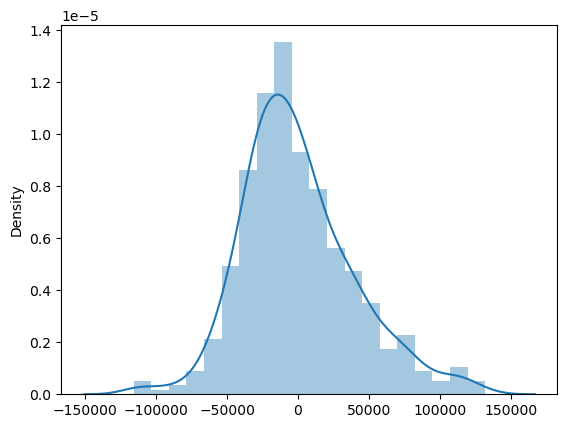

In [244]:
sns.distplot(resd_1)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

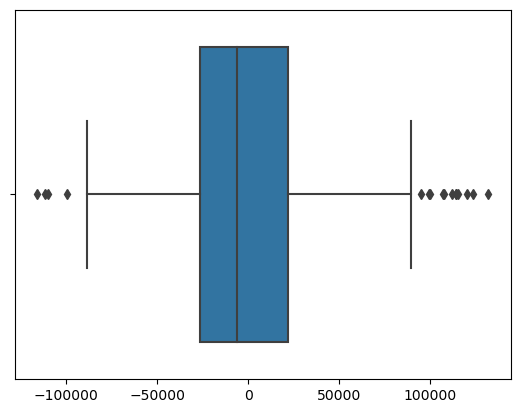

In [245]:
sns.boxplot(resd_1,orient = 'h')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

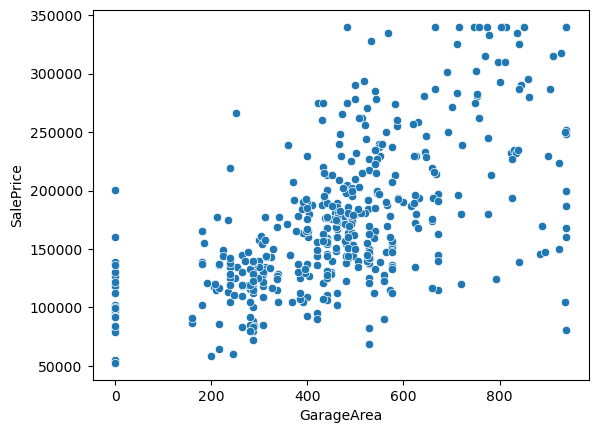

In [247]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.GarageArea)

In [248]:
data.columns

Index(['SalePrice', 'GarageArea', 'RoofStyle', 'Foundation', 'GarageType',
       'GarageCars', 'HeatingQC'],
      dtype='object')

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

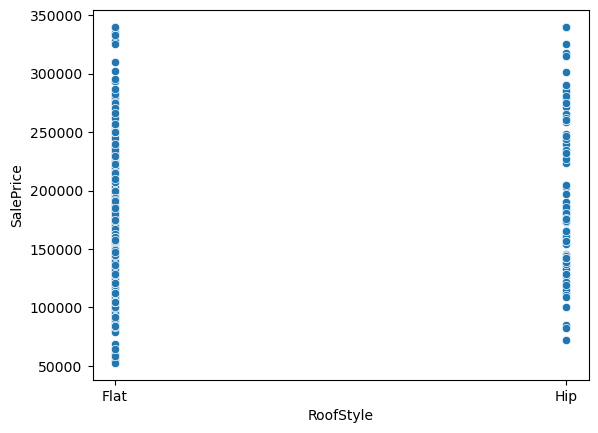

In [249]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.RoofStyle)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

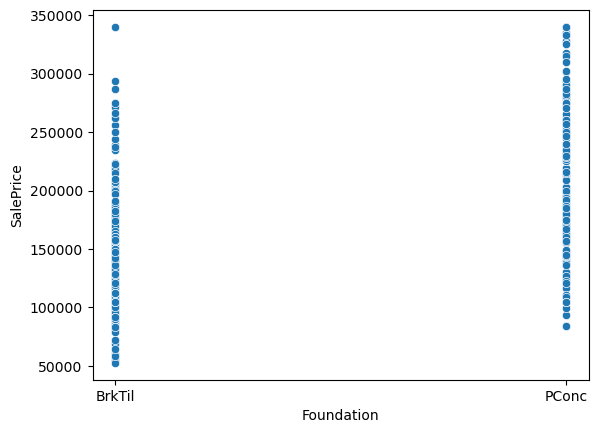

In [250]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.Foundation)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

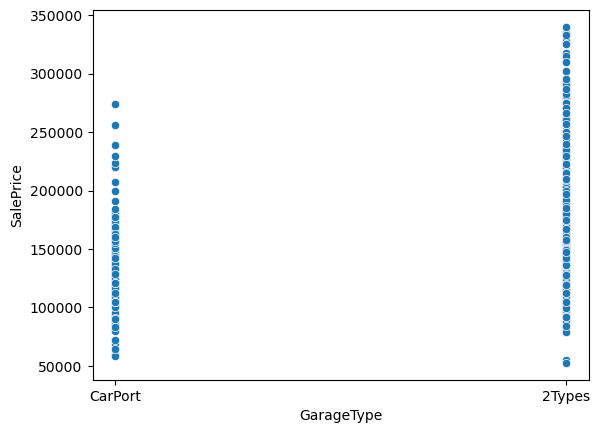

In [251]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.GarageType)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

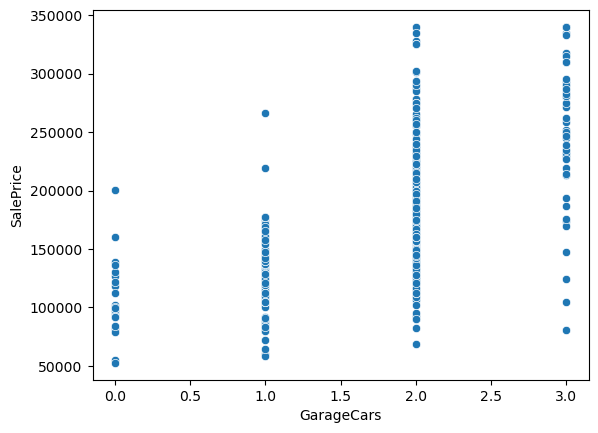

In [252]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.GarageCars)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

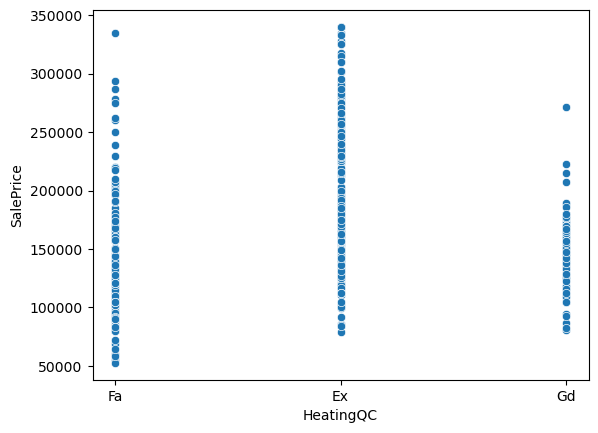

In [253]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.HeatingQC)